# TASK-1

In [2]:
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

In [9]:
train_image=[]
test_image=[]
for i in os.listdir("D:\INFOLABZ\dataset\laptop"):
    train_image.append("D:\INFOLABZ\dataset\laptop\\"+i)
    
for j in os.listdir("D:\INFOLABZ\dataset\mobile"):
    test_image.append("D:\INFOLABZ\dataset\mobile\\"+j)

In [33]:
all_data=[]
count=0
for k in range(0,50):
    all_data.append(train_image[k])

for k2 in range(50,100):
    all_data.append(test_image[count])
    count+=1

In [35]:
all_lable=[]
for p in range(0,100):
    if p<50:
        all_lable.append(0)
    if p>=50:
        all_lable.append(1)

In [25]:
def process(data):
    x=[]
    for i in data:
        image=cv.imread(i)
        image=cv.resize(image,(266,199))
        x.append(image)
    x=np.array(x)
    return x

In [38]:
X=process(all_data)

In [39]:
all_lable=np.array(all_lable)

In [99]:
model=Sequential()

model.add(Conv2D(32,kernel_size=3,input_shape=(199,266,3),activation="ReLU"))
model.add(MaxPooling2D(3))

model.add(Conv2D(64,kernel_size=3,activation="ReLU"))
model.add(Conv2D(128,kernel_size=5,activation="ReLU"))
model.add(MaxPooling2D(3))

model.add(Flatten())

model.add(Dense(100,activation="ReLU"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 197, 264, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 65, 88, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 63, 86, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 59, 82, 128)       204928    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 19, 27, 128)      0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 65664)           

In [113]:
model.fit(X,all_lable,epochs=10,steps_per_epoch=20)

Epoch 1/10
20/20 [==============================] - 17s 848ms/step - loss: 0.2902 - accuracy: 0.8500
Epoch 2/10
20/20 [==============================] - 17s 856ms/step - loss: 0.2103 - accuracy: 0.9300
Epoch 3/10
20/20 [==============================] - 17s 862ms/step - loss: 0.1529 - accuracy: 0.9400
Epoch 4/10
20/20 [==============================] - 17s 859ms/step - loss: 0.1278 - accuracy: 0.9700
Epoch 5/10
20/20 [==============================] - 17s 860ms/step - loss: 0.1074 - accuracy: 0.9800
Epoch 6/10
20/20 [==============================] - 17s 866ms/step - loss: 0.0907 - accuracy: 0.9700
Epoch 7/10
20/20 [==============================] - 17s 862ms/step - loss: 0.0828 - accuracy: 0.9800
Epoch 8/10
20/20 [==============================] - 17s 854ms/step - loss: 0.0424 - accuracy: 0.9900
Epoch 9/10
20/20 [==============================] - 17s 861ms/step - loss: 0.0540 - accuracy: 0.9700
Epoch 10/10
20/20 [==============================] - 17s 851ms/step - loss: 0.1928 - accura

In [152]:
test=["D:\laptop.png","D:\mobile.png","D:\mobile1.png","D:\laptop1.png","D:\laptop2.png","D:\mobile2.png"]

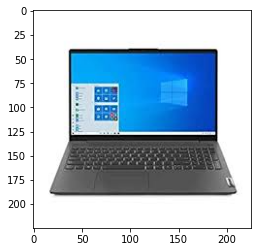

1/1 [==============================] - 0s 111ms/step
Laptop


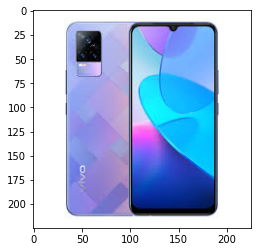

1/1 [==============================] - 0s 121ms/step
Mobile


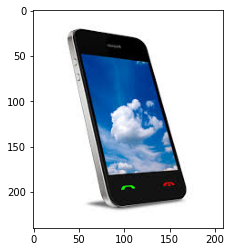

1/1 [==============================] - 0s 108ms/step
Mobile


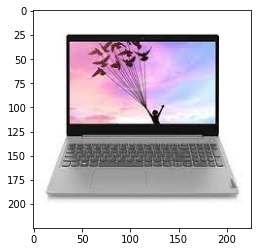

1/1 [==============================] - 0s 117ms/step
Laptop


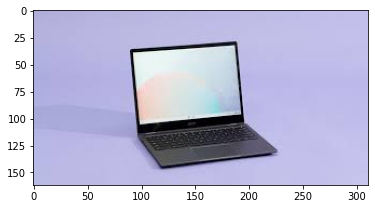

1/1 [==============================] - 0s 122ms/step
Laptop


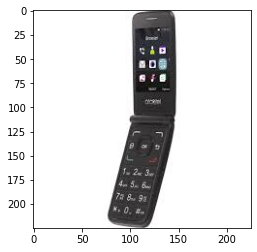

1/1 [==============================] - 0s 111ms/step
Mobile


In [153]:
for j2 in test:
    images = cv2.imread(j2)
    img=load_img(j2)
    plt.imshow(img)
    plt.show()
    images = cv2.resize(images, (266, 199))
    image_batch = np.expand_dims(images, axis=0)
    if model.predict(image_batch)<0.5:
        print("Laptop")
    else:
        print("Mobile")


# TASK 2

1. Write script to Open Camera.

In [8]:
cap=cv.VideoCapture(0)

while True:
    _,image=cap.read()
    cv.imshow("image",image)
    stop=cv.waitKey(30)
    if stop==27:
        cap.release()
        cv.destroyAllWindows()
        break

In [ ]:
cap.release()
cv.destroyAllWindows()

2. Write script to Open Camera in gray scale mode ( black and white )

In [9]:
cap=cv.VideoCapture(0)

while True:
    _,image=cap.read()
    image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    cv.imshow("image",image)
    stop=cv.waitKey(30)
    if stop==27:
        cap.release()
        cv.destroyAllWindows()
        break

In [ ]:
0xFF == ord('q'):

3. Write script to Capture image on click of key “c” while camera is open.

In [7]:
cap=cv.VideoCapture(0)

while True:
    _,image=cap.read()
    cv.imshow("image",image)
    stop=cv.waitKey(30)
    
    if cv.waitKey(1) & 0xFF ==ord("c"):
        cv.imwrite("image_photo.jpg",image)
    
    if stop==27:
        cap.release()
        cv.destroyAllWindows()
        break